<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Batch_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries:

In [72]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import seaborn as sns

# Create a valid Dataset:

In [73]:
X, y = make_moons(n_samples=100, noise=0.1, random_state=1)

In [74]:
X.shape

(100, 2)

<Axes: >

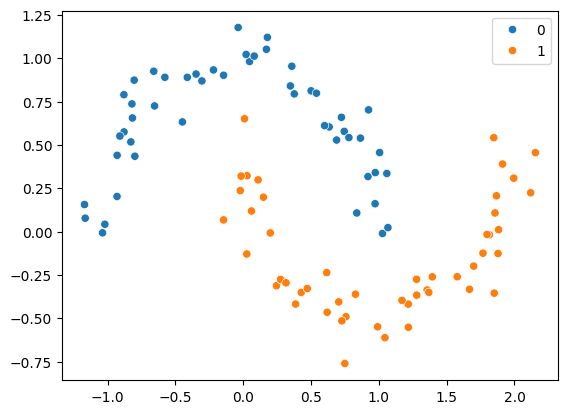

In [75]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

# Create a ANN Model:

# For activation function "Relu":

In [76]:
model = Sequential()

model.add(Dense(10, input_dim=2, activation='relu',kernel_initializer='he_normal'))
# Implementing Batch normalization:
model.add(BatchNormalization())
model.add(Dense(10,  activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(10,  activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 381 (1.49 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 60 (240.00 B)

In [78]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [80]:
# Initializng the Model on X,y and validation split of an 20%.
history = model.fit(X, y, validation_split=0.2, epochs=3500, verbose=1,callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.1570 - loss: 1.3349 - val_accuracy: 0.3500 - val_loss: 0.8885
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1352 - loss: 1.3012 - val_accuracy: 0.3500 - val_loss: 0.8722
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1508 - loss: 1.2135 - val_accuracy: 0.3500 - val_loss: 0.8586
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1273 - loss: 1.1581 - val_accuracy: 0.3500 - val_loss: 0.8445
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1664 - loss: 1.1365 - val_accuracy: 0.4500 - val_loss: 0.8307
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2211 - loss: 1.0512 - val_accuracy: 0.4500 - val_loss: 0.8180
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3641 - loss: 0.9582 - val_accuracy: 0.5000 - val_loss: 0.8051
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3727 - loss: 0.9276 - val_accuracy: 0.5000 - 

In [81]:
model.get_weights()

[array([[-1.6833361 , -1.94834   , -0.17149983, -0.0701094 , -0.31143144,
          0.59233874, -0.75344294, -0.9778443 ,  1.6862516 ,  1.2049111 ],
        [-0.81143975, -1.6669997 , -0.26371783,  1.0175966 ,  0.41199467,
         -0.20358075, -0.6480011 ,  1.3309958 , -1.4124308 , -1.2676361 ]],
       dtype=float32),
 array([-1.2537680e-04, -5.4294594e-02,  1.7555863e-01, -2.8996656e-02,
        -1.4884032e-01,  7.8610510e-02, -3.0999940e-02, -2.2530644e-01,
        -7.1930815e-03, -1.4805542e-01], dtype=float32),
 array([1.2260214 , 0.84613705, 1.0361934 , 0.8436428 , 0.96514   ,
        1.1428204 , 0.9515868 , 1.0360726 , 1.0076336 , 0.94086295],
       dtype=float32),
 array([-0.04603013, -0.01345669,  0.00097712, -0.16671649, -0.09713145,
         0.00165881, -0.02011893, -0.12410962,  0.09122428, -0.00603805],
       dtype=float32),
 array([0.2161741 , 0.18264593, 0.079252  , 0.29988465, 0.10631885,
        0.44334418, 0.06665662, 0.39877734, 1.1730704 , 0.74427605],
       dty

# Observing the model Data:

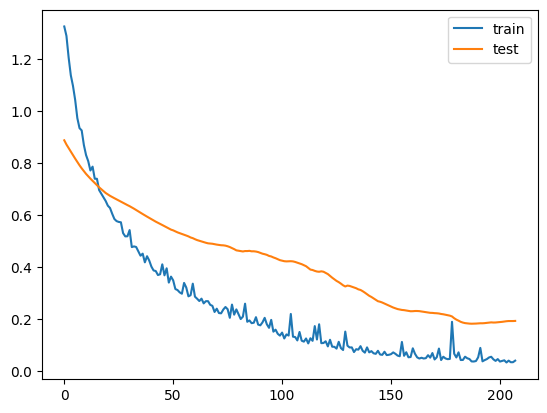

In [82]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 778us/step


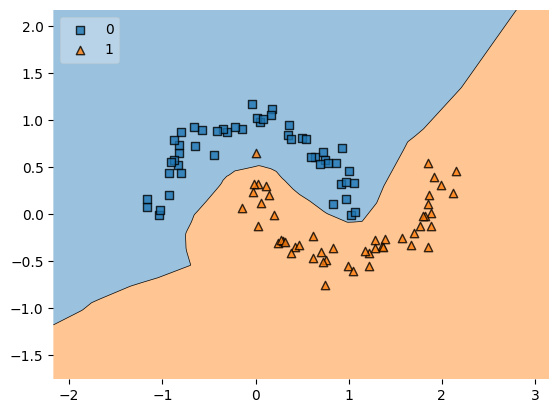

In [83]:
plot_decision_regions(X, y.ravel(), clf = model, legend=2)
plt.show()

As we can see our model has converged faster using the he_normal initializer and the desicion boundary is also not overtrained.

# For activation function "Tanh or Sigmoid":


In [84]:
model = Sequential()

model.add(Dense(10, input_dim=2, activation='tanh',kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10,  activation='tanh',kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10,  activation='tanh',kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10,  activation='tanh',kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10,  activation='tanh',kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10,  activation='tanh',kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

In [85]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 831 (3.25 KB)

 Trainable params: 711 (2.78 KB)

 Non-trainable params: 120 (480.00 B)

In [86]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [87]:
history1 = model.fit(X,y,validation_split=0.2,epochs=300,callbacks=callback,batch_size=100,verbose=0)

Epoch 89: early stopping
Restoring model weights from the end of the best epoch: 69.


# Observing our models result:

In [88]:
model.get_weights()

[array([[-0.39825493, -0.6869302 ,  0.496244  ,  0.38260418, -0.2124078 ,
         -0.19428582,  0.20999809, -0.65018404,  0.44445357,  0.638367  ],
        [-0.33423153, -0.27642044,  0.38760155, -0.22756428, -0.5570186 ,
         -0.3913249 ,  0.0329875 ,  0.69967335,  0.55981493,  0.52958536]],
       dtype=float32),
 array([ 0.0101625 , -0.03461843, -0.0132259 ,  0.01617329,  0.02809444,
         0.00918282,  0.00630312, -0.00174378, -0.01074252,  0.02995966],
       dtype=float32),
 array([1.0092932 , 0.9748629 , 0.9740466 , 1.02746   , 1.0148852 ,
        0.9944444 , 0.9738207 , 1.0320522 , 1.002754  , 0.98627996],
       dtype=float32),
 array([ 0.00072325, -0.01171622, -0.01887042,  0.0061651 ,  0.00159681,
         0.01893718,  0.00016403, -0.00347621, -0.0125918 ,  0.00720099],
       dtype=float32),
 array([-0.11687532, -0.15267946,  0.1319386 ,  0.06770431, -0.09685058,
        -0.08324257,  0.05533455, -0.05622221,  0.14158611,  0.17048793],
       dtype=float32),
 array([

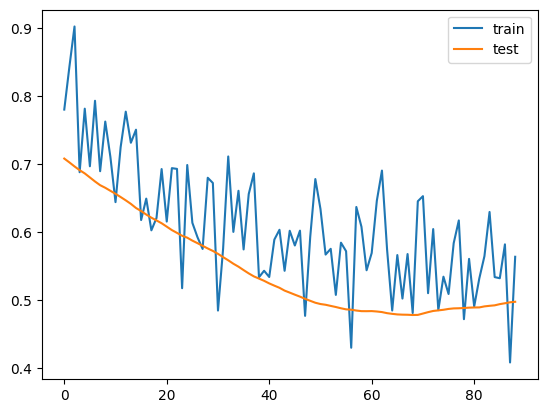

In [89]:
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 930us/step


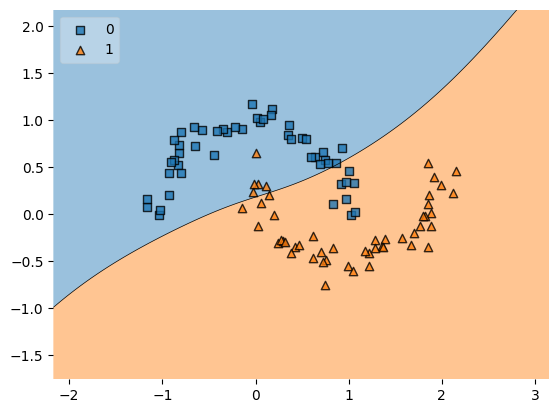

In [90]:
plot_decision_regions(X, y.ravel(), clf = model, legend=2)
plt.show()

I think uniform is more Good


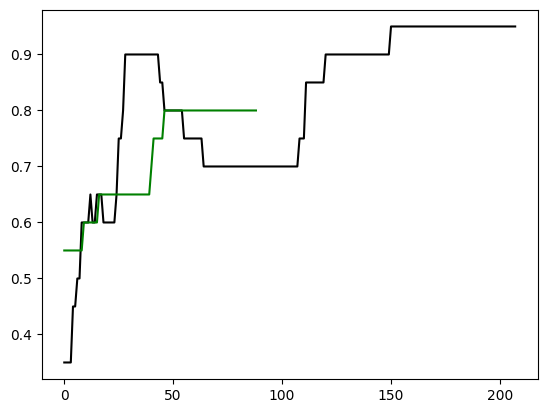

In [92]:
plt.plot(history.history['val_accuracy'],color='black')
plt.plot(history1.history['val_accuracy'],color='green')